In [114]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\kjain\.cache\kagglehub\datasets\uciml\sms-spam-collection-dataset\versions\1


In [116]:
import pandas as pd
import os

# Folder path
dataset_dir = r"C:\Users\kjain\.cache\kagglehub\datasets\uciml\sms-spam-collection-dataset\versions\1"
dataset_path = os.path.join(dataset_dir, "spam.csv")

# Load the CSV
# The spam.csv from Kaggle usually has commas, but sometimes extra columns may exist, so we'll inspect first
data = pd.read_csv(dataset_path, encoding='latin-1')  # encoding='latin-1' avoids special char issues

# Optional: drop unnecessary extra columns
# Most Kaggle spam.csv files have columns: 'v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'
data = data[['v1', 'v2']]  # keep only label and message
data.columns = ['label', 'message']  # rename columns

# Check the first rows
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [118]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [119]:
data["label"] = encoder.fit_transform(data["label"])

In [120]:
data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [121]:
data.duplicated().sum()

403

In [122]:
data = data.drop_duplicates(keep = "first")

In [123]:
data.duplicated().sum()

0

In [124]:
data.shape

(5169, 2)

In [125]:
#EDA
data["label"].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

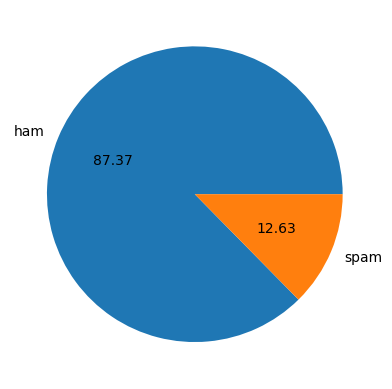

In [126]:
import matplotlib.pyplot as plt
plt.pie(data["label"].value_counts(),labels = ["ham","spam"],autopct = "%0.2f")
plt.show()

In [127]:
import nltk

In [128]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kjain\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [129]:
data["num_characters"] = data['message'].apply(len)

In [130]:
data.head()

,label,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [131]:
import nltk
from nltk.tokenize import word_tokenize

data["num_words"] = data['message'].apply(lambda x: len(word_tokenize(x)))
data

,label,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [132]:
from nltk.tokenize import sent_tokenize

data["num_sentences"] = data['message'].apply(lambda x: len(sent_tokenize(x)))
data

,label,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [133]:
data.describe()

,label,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [134]:
#ham
data[data["label"] == 0].describe()

,label,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [135]:
#spam
data[data["label"] == 1].describe()

,label,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


In [136]:
import seaborn as sns

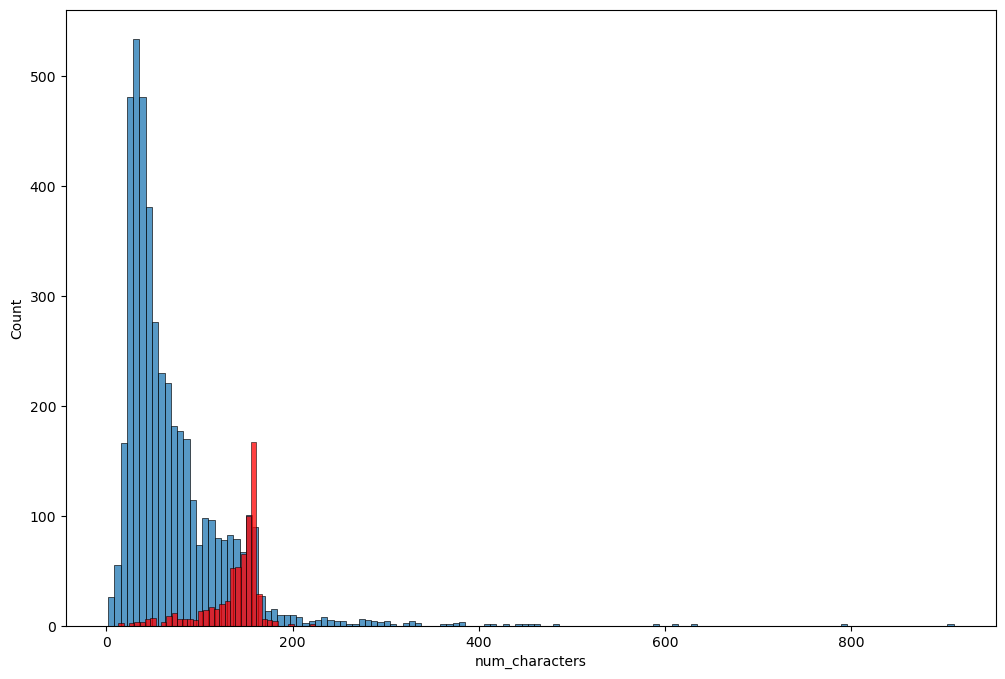

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
sns.histplot(data[data["label"] == 0]["num_characters"], kde=False)
sns.histplot(data[data["label"] == 1]["num_characters"], color="red", kde=False)

plt.show()


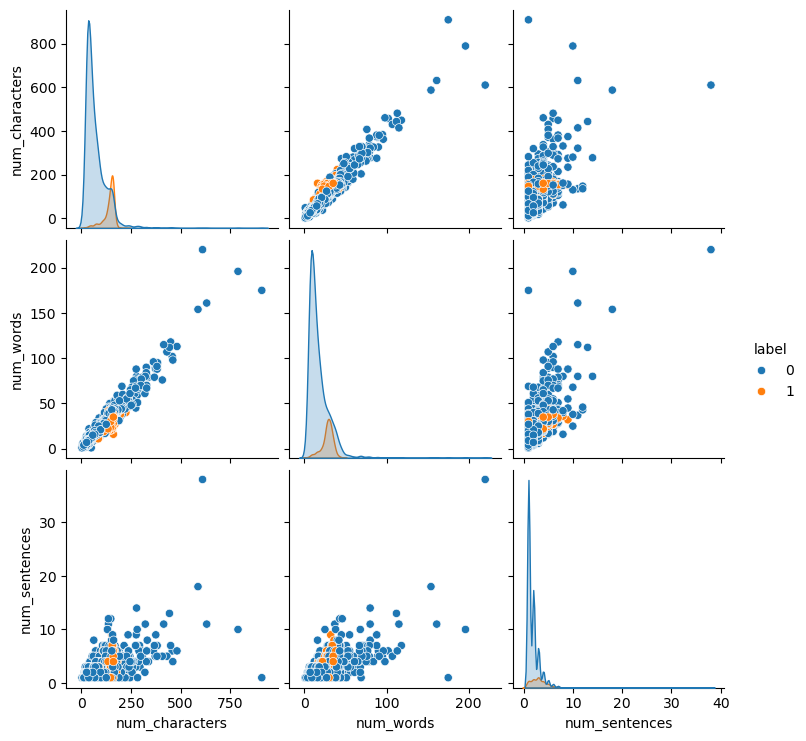

In [138]:
sns.pairplot(data,hue = "label")

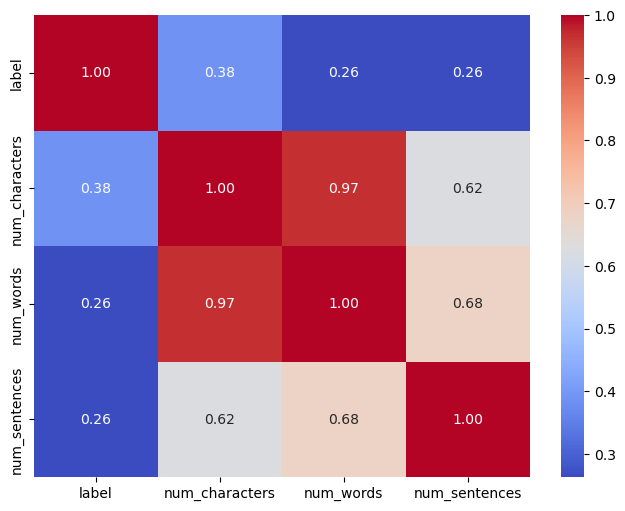

In [139]:

# Select only numeric columns
corr = data.select_dtypes(include=["number"]).corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [140]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


# Initialize stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Preprocess a single string of text:
    1. Lowercase
    2. Tokenize using nltk.word_tokenize
    3. Remove non-alphanumeric tokens
    4. Remove stopwords
    5. Apply stemming
    """
    # 1. Lowercase
    text = text.lower()
    
    # 2. Tokenize
    tokens = word_tokenize(text)
    
    # 3 & 4. Remove non-alphanumeric tokens and stopwords
    clean_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    
    # 5. Stemming
    stemmed_tokens = [stemmer.stem(token) for token in clean_tokens]
    
    return stemmed_tokens

preprocess_text("Hi how are you Nitish")

['hi', 'nitish']

In [141]:
data["transformed_text"] = data['message'].apply(preprocess_text)
data

,label,message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,"[2nd, time, tri, 2, contact, u, pound, prize, ..."
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,"[b, go, esplanad, fr, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,"[piti, mood, suggest]"
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,"[guy, bitch, act, like, interest, buy, someth,..."


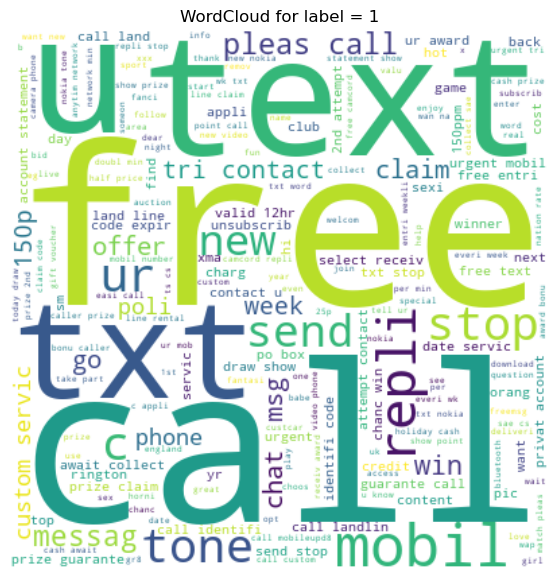

In [142]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter label == 1
texts = data[data["label"] == 1]["transformed_text"]

# Join list of tokens into a single string
spam_text = " ".join([" ".join(tokens) for tokens in texts if isinstance(tokens, list)])

# Generate WordCloud
spam_wc = WordCloud(width=400, height=400, background_color='white').generate(spam_text)

# Display
plt.figure(figsize=(15, 7))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud for label = 1")
plt.show()


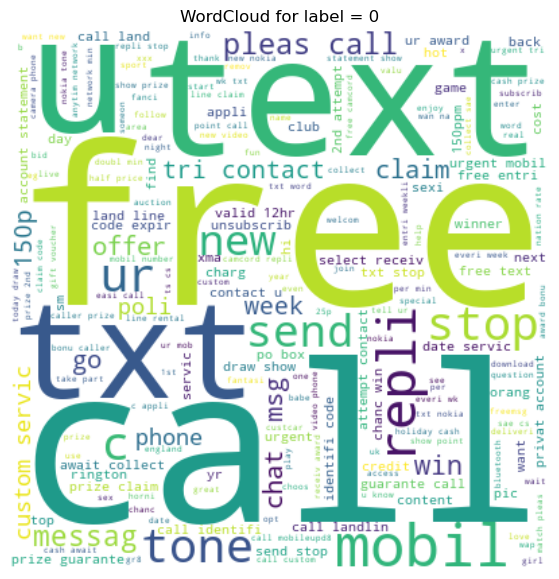

In [143]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter label == 0
texts = data[data["label"] == 0]["transformed_text"]

# Join list of tokens into a single string
ham_text = " ".join([" ".join(tokens) for tokens in texts if isinstance(tokens, list)])

# Generate WordCloud
ham_wc = WordCloud(width=400, height=400, background_color='white').generate(spam_text)

# Display
plt.figure(figsize=(15, 7))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud for label = 0")
plt.show()


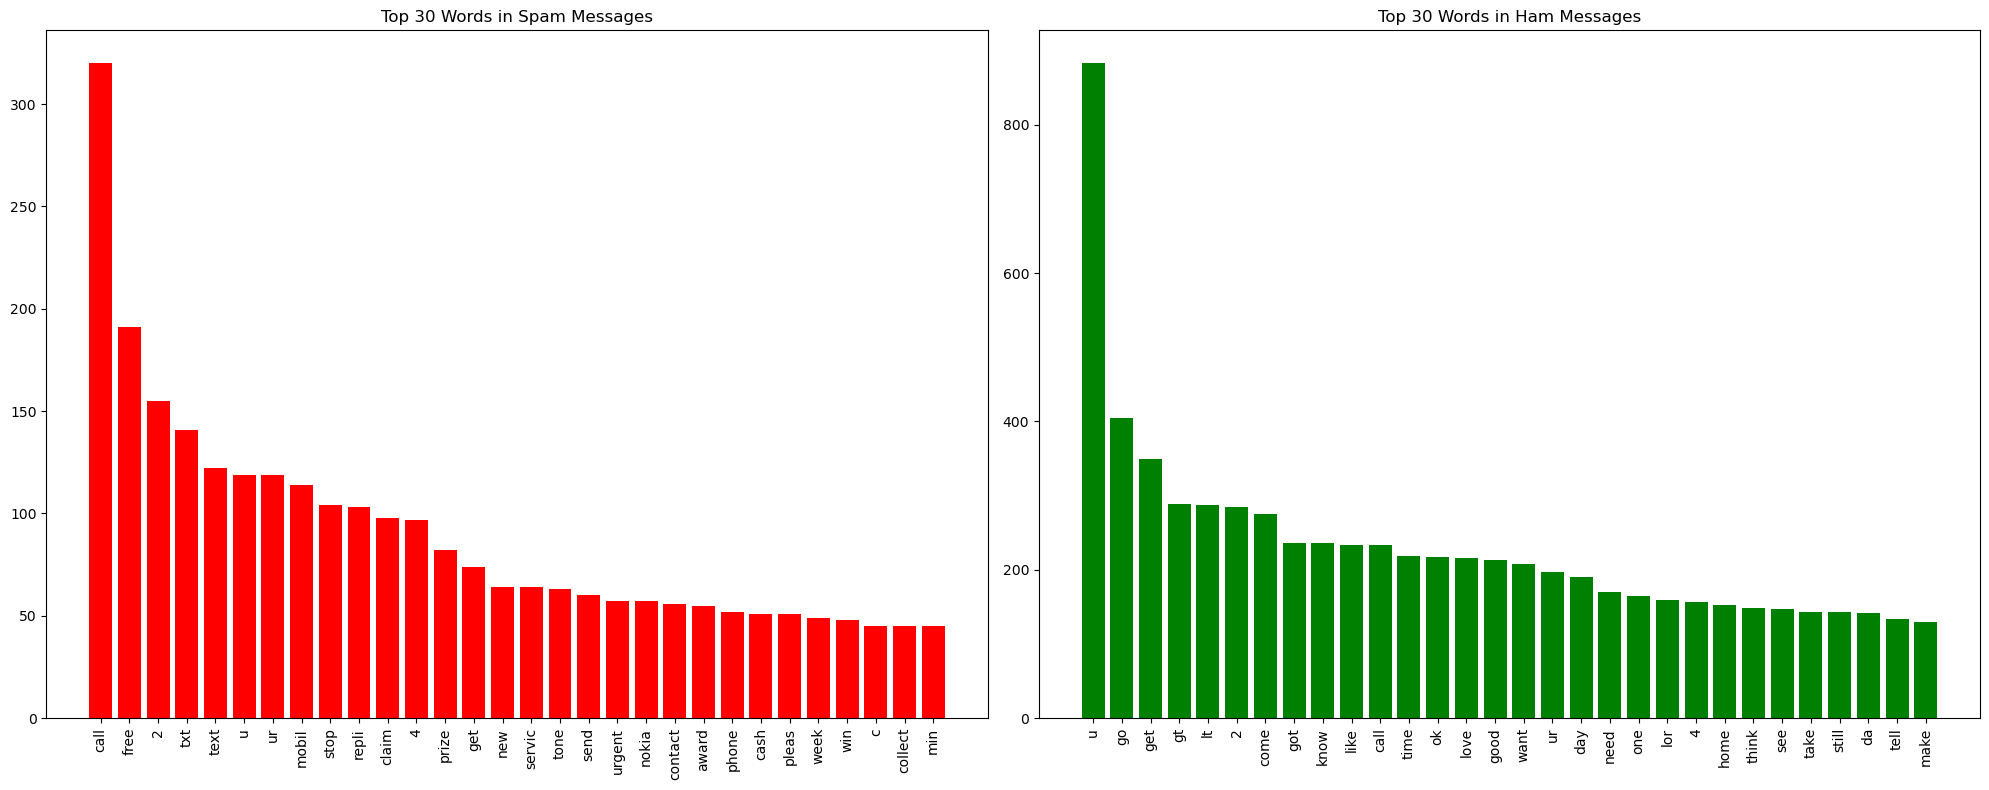

In [144]:
import matplotlib.pyplot as plt

def get_top_words(df, label, top_n=30):
    texts = df[df["label"] == label]["transformed_text"]
    word_counts = {}
    for tokens in texts:
        if isinstance(tokens, list):
            for word in tokens:
                if word in word_counts:
                    word_counts[word] += 1
                else:
                    word_counts[word] = 1
    # Sort and return top N words
    return sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]

# Get top 30 words for spam and ham
top_spam = get_top_words(data, label=1)
top_ham = get_top_words(data, label=0)

# Separate words and counts
spam_words, spam_counts = zip(*top_spam)
ham_words, ham_counts = zip(*top_ham)

# Plotting
plt.figure(figsize=(20, 8))

# Spam barplot
plt.subplot(1, 2, 1)
plt.bar(spam_words, spam_counts, color='red')
plt.xticks(rotation=90)
plt.title("Top 30 Words in Spam Messages")

# Ham barplot
plt.subplot(1, 2, 2)
plt.bar(ham_words, ham_counts, color='green')
plt.xticks(rotation=90)
plt.title("Top 30 Words in Ham Messages")

plt.tight_layout()
plt.show()


In [145]:
# Import libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score



In [146]:
# 1. Prepare data
X = data['transformed_text'].apply(lambda x: ' '.join(x))  # join token lists to strings if needed
y = data['label']

# 2. Convert text to feature vectors
vectorizer = CountVectorizer()
X_vect = vectorizer.fit_transform(X)

# Convert to dense array for GaussianNB (needs dense input)
X_dense = X_vect.toarray()



In [147]:
# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)
X_train_dense, X_test_dense = train_test_split(X_dense, test_size=0.2, random_state=42)  # for GaussianNB

# 4. Initialize models
models = {
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    "GaussianNB": GaussianNB()
}

# 5. Train and evaluate
for name, model in models.items():
    print(f"\n--- {name} ---")
    
    # Use dense input for GaussianNB
    if name == "GaussianNB":
        model.fit(X_train_dense, y_train)
        y_pred = model.predict(X_test_dense)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    cf = confusion_matrix(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print("Confusion Matrix:")
    print(cf)



--- MultinomialNB ---
Accuracy: 0.9739
Precision: 0.8882
Confusion Matrix:
[[872  17]
 [ 10 135]]

--- BernoulliNB ---
Accuracy: 0.9662
Precision: 0.9661
Confusion Matrix:
[[885   4]
 [ 31 114]]

--- GaussianNB ---
Accuracy: 0.8685
Precision: 0.5185
Confusion Matrix:
[[772 117]
 [ 19 126]]


In [148]:
# Import libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# 1. Prepare data
X = data['transformed_text'].apply(lambda x: ' '.join(x))  # join token lists to strings if needed
y = data['label']

# 2. Convert text to TF-IDF feature vectors
vectorizer = TfidfVectorizer()
X_vect = vectorizer.fit_transform(X)

# Convert to dense array for GaussianNB
X_dense = X_vect.toarray()

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)
X_train_dense, X_test_dense = train_test_split(X_dense, test_size=0.2, random_state=42)  # for GaussianNB

# 4. Initialize models
models = {
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    "GaussianNB": GaussianNB()
}

# 5. Train and evaluate
for name, model in models.items():
    print(f"\n--- {name} ---")
    
    # Use dense input for GaussianNB
    if name == "GaussianNB":
        model.fit(X_train_dense, y_train)
        y_pred = model.predict(X_test_dense)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    cf = confusion_matrix(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print("Confusion Matrix:")
    print(cf)



--- MultinomialNB ---
Accuracy: 0.9613
Precision: 0.9907
Confusion Matrix:
[[888   1]
 [ 39 106]]

--- BernoulliNB ---
Accuracy: 0.9662
Precision: 0.9661
Confusion Matrix:
[[885   4]
 [ 31 114]]

--- GaussianNB ---
Accuracy: 0.8636
Precision: 0.5084
Confusion Matrix:
[[772 117]
 [ 24 121]]


In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

# ------------- Prepare data ----------------
X = data['transformed_text'].apply(lambda x: ' '.join(x))
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

X_train_dense = X_train_tfidf.toarray()  # For models that need dense input
X_test_dense = X_test_tfidf.toarray()

# ------------- Define models ----------------
models = {
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    "GaussianNB": GaussianNB(),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=500),
    "SVC": SVC(kernel='linear', probability=True),
    "KNeighbors": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42)
}

# ------------- Train & evaluate ----------------
results = []

for name, model in models.items():
    if name == "GaussianNB":
        model.fit(X_train_dense, y_train)
        y_pred = model.predict(X_test_dense)
    else:
        model.fit(X_train_tfidf, y_train)
        y_pred = model.predict(X_test_tfidf)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc, "Precision": prec})

# Convert results to DataFrame
import pandas as pd
results_df = pd.DataFrame(results)

# Top 5 models based on precision
top5_precision = results_df.sort_values(by="Precision", ascending=False).head(5)
print("Top 5 Models Based on Precision:\n", top5_precision)

# Optional: show full metrics for top 5
for name in top5_precision['Model']:
    print(f"\n--- {name} ---")
    if name == "GaussianNB":
        y_pred = models[name].predict(X_test_dense)
    else:
        y_pred = models[name].predict(X_test_tfidf)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


C:\Users\kjain\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Top 5 Models Based on Precision:
            Model  Accuracy  Precision
0  MultinomialNB  0.968085   1.000000
1    BernoulliNB  0.970019   1.000000
9     KNeighbors  0.910058   1.000000
4     ExtraTrees  0.977756   0.991935
3   RandomForest  0.970019   0.991379

--- MultinomialNB ---
Confusion Matrix:
 [[889   0]
 [ 33 112]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       1.00      0.77      0.87       145

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034


--- BernoulliNB ---
Confusion Matrix:
 [[889   0]
 [ 31 114]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       1.00      0.79      0.88       145

    accuracy                           0.97      1034
   macro avg     

In [150]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

# Define the top models
top_models = [
    ('MultinomialNB', MultinomialNB()),
    ('BernoulliNB', BernoulliNB()),
    ('ExtraTrees', ExtraTreesClassifier(n_estimators=200, random_state=42)),
    ('RandomForest', RandomForestClassifier(n_estimators=200, random_state=42))
]

# Create a soft voting ensemble
ensemble = VotingClassifier(estimators=top_models, voting='soft')

# Fit ensemble on training data
ensemble.fit(X_train_tfidf, y_train)

# Predictions
y_pred = ensemble.predict(X_test_tfidf)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
cf = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Ensemble Model Metrics:")
print("Accuracy:", acc)
print("Precision:", prec)
print("Confusion Matrix:\n", cf)
print("Classification Report:\n", report)


Ensemble Model Metrics:
Accuracy: 0.9738878143133463
Precision: 1.0
Confusion Matrix:
 [[889   0]
 [ 27 118]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       889
           1       1.00      0.81      0.90       145

    accuracy                           0.97      1034
   macro avg       0.99      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034



In [152]:
from sklearn.model_selection import GridSearchCV

# Parameter grids
param_grids = {
    "MultinomialNB": {"alpha": [0.1, 0.5, 1.0]},
    "BernoulliNB": {"alpha": [0.1, 0.5, 1.0], "binarize": [0.0, 0.5, 1.0]},
    "GaussianNB": {"var_smoothing": [1e-9, 1e-8, 1e-7]},
    "RandomForest": {"n_estimators": [100, 200, 300], "max_depth": [None, 10, 20], "min_samples_split": [2, 5]},
    "ExtraTrees": {"n_estimators": [100, 200], "max_depth": [None, 10, 20], "min_samples_split": [2, 5]},
    "GradientBoosting": {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1, 0.2], "max_depth": [3, 5]},
    "AdaBoost": {"n_estimators": [50, 100, 200], "learning_rate": [0.05, 0.1, 0.5]},
    "LogisticRegression": {"C": [0.1, 1, 10], "penalty": ["l2"], "solver": ["lbfgs"]},
    "SVC": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "KNeighbors": {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]},
    "DecisionTree": {"max_depth": [None, 10, 20], "min_samples_split": [2, 5]}
}

best_models = {}
results_tuned = []

for name, model in models.items():
    print(f"Tuning {name}...")
    if name == "GaussianNB":
        X_input = X_train_dense
        param_grid = param_grids[name]
    else:
        X_input = X_train_tfidf
        param_grid = param_grids[name]
    
    grid = GridSearchCV(model, param_grid, cv=3, scoring='precision', n_jobs=-1)
    grid.fit(X_input, y_train)
    
    best_models[name] = grid.best_estimator_
    
    # Predictions
    if name == "GaussianNB":
        y_pred = best_models[name].predict(X_test_dense)
    else:
        y_pred = best_models[name].predict(X_test_tfidf)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    results_tuned.append({"Model": name, "Accuracy": acc, "Precision": prec})

# Results DataFrame
results_tuned_df = pd.DataFrame(results_tuned)

# Top 5 models based on precision
top5_tuned = results_tuned_df.sort_values(by="Precision", ascending=False).head(5)
print("Top 5 Tuned Models Based on Precision:\n", top5_tuned)

# Optional: show full metrics for top 5
for name in top5_tuned['Model']:
    print(f"\n--- {name} ---")
    if name == "GaussianNB":
        y_pred = best_models[name].predict(X_test_dense)
    else:
        y_pred = best_models[name].predict(X_test_tfidf)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Tuning MultinomialNB...
Tuning BernoulliNB...
Tuning GaussianNB...
Tuning RandomForest...
Tuning ExtraTrees...
Tuning GradientBoosting...
Tuning AdaBoost...


C:\Users\kjain\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Tuning LogisticRegression...
Tuning SVC...
Tuning KNeighbors...
Tuning DecisionTree...
Top 5 Tuned Models Based on Precision:
            Model  Accuracy  Precision
0  MultinomialNB  0.968085        1.0
1    BernoulliNB  0.982592        1.0
3   RandomForest  0.897485        1.0
4     ExtraTrees  0.879110        1.0
8            SVC  0.901354        1.0

--- MultinomialNB ---
Confusion Matrix:
 [[889   0]
 [ 33 112]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       1.00      0.77      0.87       145

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034


--- BernoulliNB ---
Confusion Matrix:
 [[889   0]
 [ 18 127]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       1.00      0.88

In [154]:
# After the grid search loop
print("Best parameters for BernoulliNB:", best_models['BernoulliNB'].get_params())


Best parameters for BernoulliNB: {'alpha': 0.1, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}


In [159]:
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import numpy as np

# ------------------ Load saved TF-IDF and model ------------------
with open("tfidf_vectorizer.pkl", "rb") as f:
    tfidf = pickle.load(f)

with open("bernoulli_model.pkl", "rb") as f:
    model = pickle.load(f)

# ------------------ Preprocessing function ------------------
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    clean_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    stemmed_tokens = [stemmer.stem(token) for token in clean_tokens]
    return " ".join(stemmed_tokens)  # join back for vectorizer

# ------------------ Explain function ------------------
def explain_prediction(text):
    processed = preprocess_text(text)
    vector = tfidf.transform([processed])
    prediction = model.predict(vector)[0]
    
    # Get feature contributions
    spam_probs = model.feature_log_prob_[1]  # class 1
    ham_probs = model.feature_log_prob_[0]   # class 0
    contributions = dict(zip(tfidf.get_feature_names_out(), spam_probs - ham_probs))
    
    # Score each word in input
    words = processed.split()
    word_scores = {word: contributions.get(word, 0) for word in words}
    top_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    
    return {
        "prediction": int(prediction),
        "top_contributing_words": top_words
    }

# ------------------ Test ------------------
sample_text = "Congratulations! You have won a free ticket to Bahamas. Claim now!"
result = explain_prediction(sample_text)
print("Prediction (1=spam, 0=ham):", result["prediction"])
print("Top contributing words:", result["top_contributing_words"])


Prediction (1=spam, 0=ham): 1
Top contributing words: [('claim', 8.559754668616979), ('congratul', 6.674871410179534), ('free', 3.0355576233801296), ('ticket', 0.7471837695493084), ('bahama', 0)]


In [163]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# ---------------- Load Data ----------------
# Assuming 'data' is your DataFrame with 'message', 'transformed_text', 'label'
print("=== DATA SUMMARY ===")
print("Total messages:", len(data))
print("Number of spam messages:", data['label'].sum())
print("Number of ham messages:", len(data) - data['label'].sum())
print("\nExample original message:", data['message'].iloc[0])
print("Example transformed message:", data['transformed_text'].iloc[0])

# ---------------- Load TF-IDF & Model ----------------
with open("tfidf_vectorizer.pkl", "rb") as f:
    tfidf = pickle.load(f)

with open("bernoulli_model.pkl", "rb") as f:
    bernoulli_model = pickle.load(f)

# ---------------- Vectorizer Summary ----------------
print("\n=== TF-IDF Vectorizer Summary ===")
print("Max features:", tfidf.max_features)
print("N-gram range:", tfidf.ngram_range)
print("Vocabulary size:", len(tfidf.vocabulary_))

# ---------------- Model Summary ----------------
print("\n=== BernoulliNB Model Summary ===")
print("Alpha:", bernoulli_model.alpha)
print("Binarize:", bernoulli_model.binarize)
print("Fit prior:", bernoulli_model.fit_prior)

# ---------------- Top contributing words ----------------
# Get top words for spam
feature_names = tfidf.get_feature_names_out()
log_probs_spam = bernoulli_model.feature_log_prob_[1] - bernoulli_model.feature_log_prob_[0]
top_indices = log_probs_spam.argsort()[::-1][:10]
top_words = [(feature_names[i], log_probs_spam[i]) for i in top_indices]
print("\nTop 10 contributing words for spam prediction:")
for word, score in top_words:
    print(word, ":", score)

# ---------------- Evaluation Metrics ----------------
from sklearn.metrics import accuracy_score, precision_score, classification_report

X = data['transformed_text'].apply(lambda x: ' '.join(x))
y = data['label']

X_tfidf = tfidf.transform(X)
y_pred = bernoulli_model.predict(X_tfidf)

print("\n=== Model Evaluation ===")
print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))


=== DATA SUMMARY ===
Total messages: 5169
Number of spam messages: 653
Number of ham messages: 4516

Example original message: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Example transformed message: ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat']

=== TF-IDF Vectorizer Summary ===
Max features: 5000
N-gram range: (1, 2)
Vocabulary size: 5000

=== BernoulliNB Model Summary ===
Alpha: 0.1
Binarize: 0.0
Fit prior: True

Top 10 contributing words for spam prediction:
claim : 8.559754668616979
prize : 8.240103230109138
tone : 7.85421916720008
guarante : 7.7972236861507165
cs : 7.603695878200945
150ppm : 7.490794147998984
tri contact : 7.217614636913829
150p : 7.217614636913829
18 : 7.10700476536986
guarante call : 7.046745573851663

=== Model Evaluation ===
Accuracy: 0.9899400270845424
Precision: 1.0

Classification Report:
               precisi